In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from time import time

In [50]:
# Pembacaan dataset dengan menggunakan method Read_csv yang disediakan modul pandas.
# method tersebut dipakai karena dataset hasil unduh berjenis csv dimana baris pertama
# bukanlah data kolom, atau tanpa header.
data = pd.read_csv('./breast-cancer-wisconsin.data')
data.columns=['Id number', 'Clump Thickness', 'Uniformity of cell size', 'Uniformity of Cell Shape', 'Marginal Adhesion', 'single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoi', 'Mitoses', 'Class']

# buat variabel data2 yang akan diisi dengan dataset yang sudah di ubah ke numerik dan
# semua cell yang kosong diberi tana NaN (Not a Number)
data2 = data.apply(pd.to_numeric, errors='coerce')

# Hapus semua data yang tidak lengkap, yaitu yang isinya mengandung NaN.
data = data2.dropna() # Rewrite previous data entry with new complete data

# hapus ID Number karena tidak di butuhkan dalam klasifikasi ini.
del data['Id number']

# data

data

,Clump Thickness,Uniformity of cell size,Uniformity of Cell Shape,Marginal Adhesion,single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoi,Mitoses,Class
0,5,4,4,5,7,10.0,3,2,1,2
1,3,1,1,1,2,2.0,3,1,1,2
2,6,8,8,1,3,4.0,3,7,1,2
3,4,1,1,3,2,1.0,3,1,1,2
4,8,10,10,8,7,10.0,9,7,1,4
...,...,...,...,...,...,...,...,...,...,...
693,3,1,1,1,3,2.0,1,1,1,2
694,2,1,1,1,2,1.0,1,1,1,2
695,5,10,10,3,7,3.0,8,10,2,4
696,4,8,6,4,3,4.0,10,6,1,4


In [66]:
# Lakukan faktorisasi
data.loc[:, "Class"] = pd.factorize(data.loc[:, "Class"])[0]
#tampilkan hasilnya
data[["Class"]].head()

# tampilkan nilai/isi kolom class
# class_list = data["Class"].tolist()
# print(class_list)


# untuk ngitung ada berapa data yang value nya sama
nilai_unik = data.loc[:, "Class"].value_counts()
print("\nFrekuensi isi kolom 'Class' : ")
print(nilai_unik)

nilai_unik = data.loc[:, "Uniformity of cell size"].value_counts()
print("\nFrekuensi isi kolom 'Uniformity of cell size' : ")
print(nilai_unik)








Frekuensi isi kolom 'Class' : 
0    443
1    239
Name: Class, dtype: int64

Frekuensi isi kolom 'Uniformity of cell size' : 
1     372
10     67
3      52
2      45
4      38
5      30
8      28
6      25
7      19
9       6
Name: Uniformity of cell size, dtype: int64


C:\Users\ACER\AppData\Local\Temp\ipykernel_22184\1877971474.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:, "Class"] = pd.factorize(data.loc[:, "Class"])[0]


In [52]:
# lakukan faktorisasi
data.loc[:, "Class"] = pd.factorize(data.loc[:, "Class"])[0]
# Tampilkan hasilnya
data[["Class"]].head

#tampilkan nilai/isi kolom Class
class_list = data["Class"].tolist()

print(class_list)

nilai_unik = data.loc[:, "Class"].value_counts()
print("\nFrekuensi isi kolom \"Class\":")
print(nilai_unik)

[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 

C:\Users\ACER\AppData\Local\Temp\ipykernel_22184\2817854013.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:, "Class"] = pd.factorize(data.loc[:, "Class"])[0]


In [67]:
print(data.shape)

(682, 10)


In [53]:
#check number of entries in a Column
num_of_patients = data.shape[0]

#number of benign of breast cancer data
benign_number = data.loc[(data['Class']==0)]
number_benign = benign_number.shape[0]

# Number of Malignant breast canser data
malignant_number = data.loc[(data['Class']==1)]
number_malignant = malignant_number.shape[0]

#percentage of benign Class data
benign_percentage = number_benign*100/num_of_patients

# print the result
print("Total Number of Patient: {}".format(num_of_patients))
print("number of benign tumor patient: {}".format(number_benign))
print("number of Malignant tumor patient: {}".format(number_malignant))
print("percentage of benign tumor patient: {:.2f}".format(benign_percentage))


Total Number of Patient: 682
number of benign tumor patient: 443
number of Malignant tumor patient: 239
percentage of benign tumor patient: 64.96


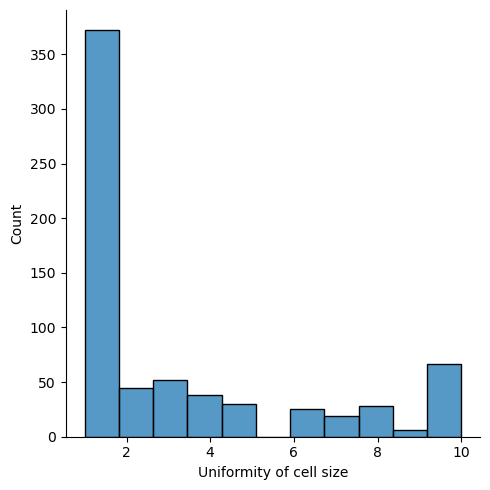

In [68]:
# print(data['Uniformity of cell size'])
# plt.show()
sns.displot(data['Uniformity of cell size'])
plt.show()

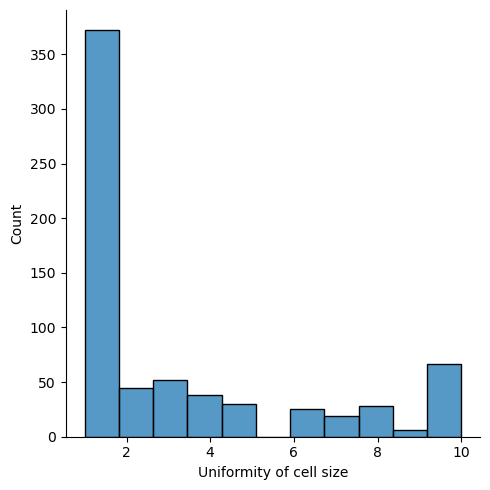

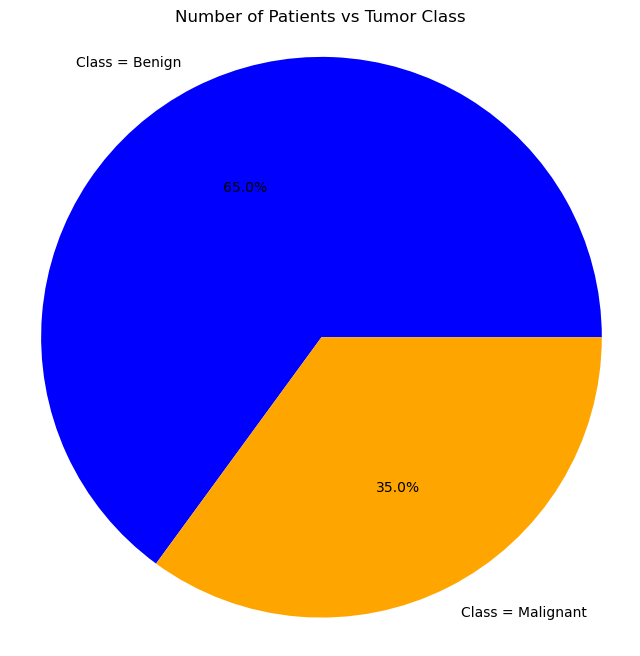

In [55]:
# Using lambda values to change values in the class column
# data["Class"]=data["Class"].apply(lambda x: x.cat.codes)
# data["Class"]=pd.factorize(data['Class'])(0)
# Data to plot
from turtle import color


plt.figure(figsize=(8,8))
labels = 'Class = Benign', 'Class = Malignant'
plt.title('Number of Patients vs Tumor Class')
sizes = [number_benign, number_malignant]
colors = ['blue', 'orange']

#plot pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

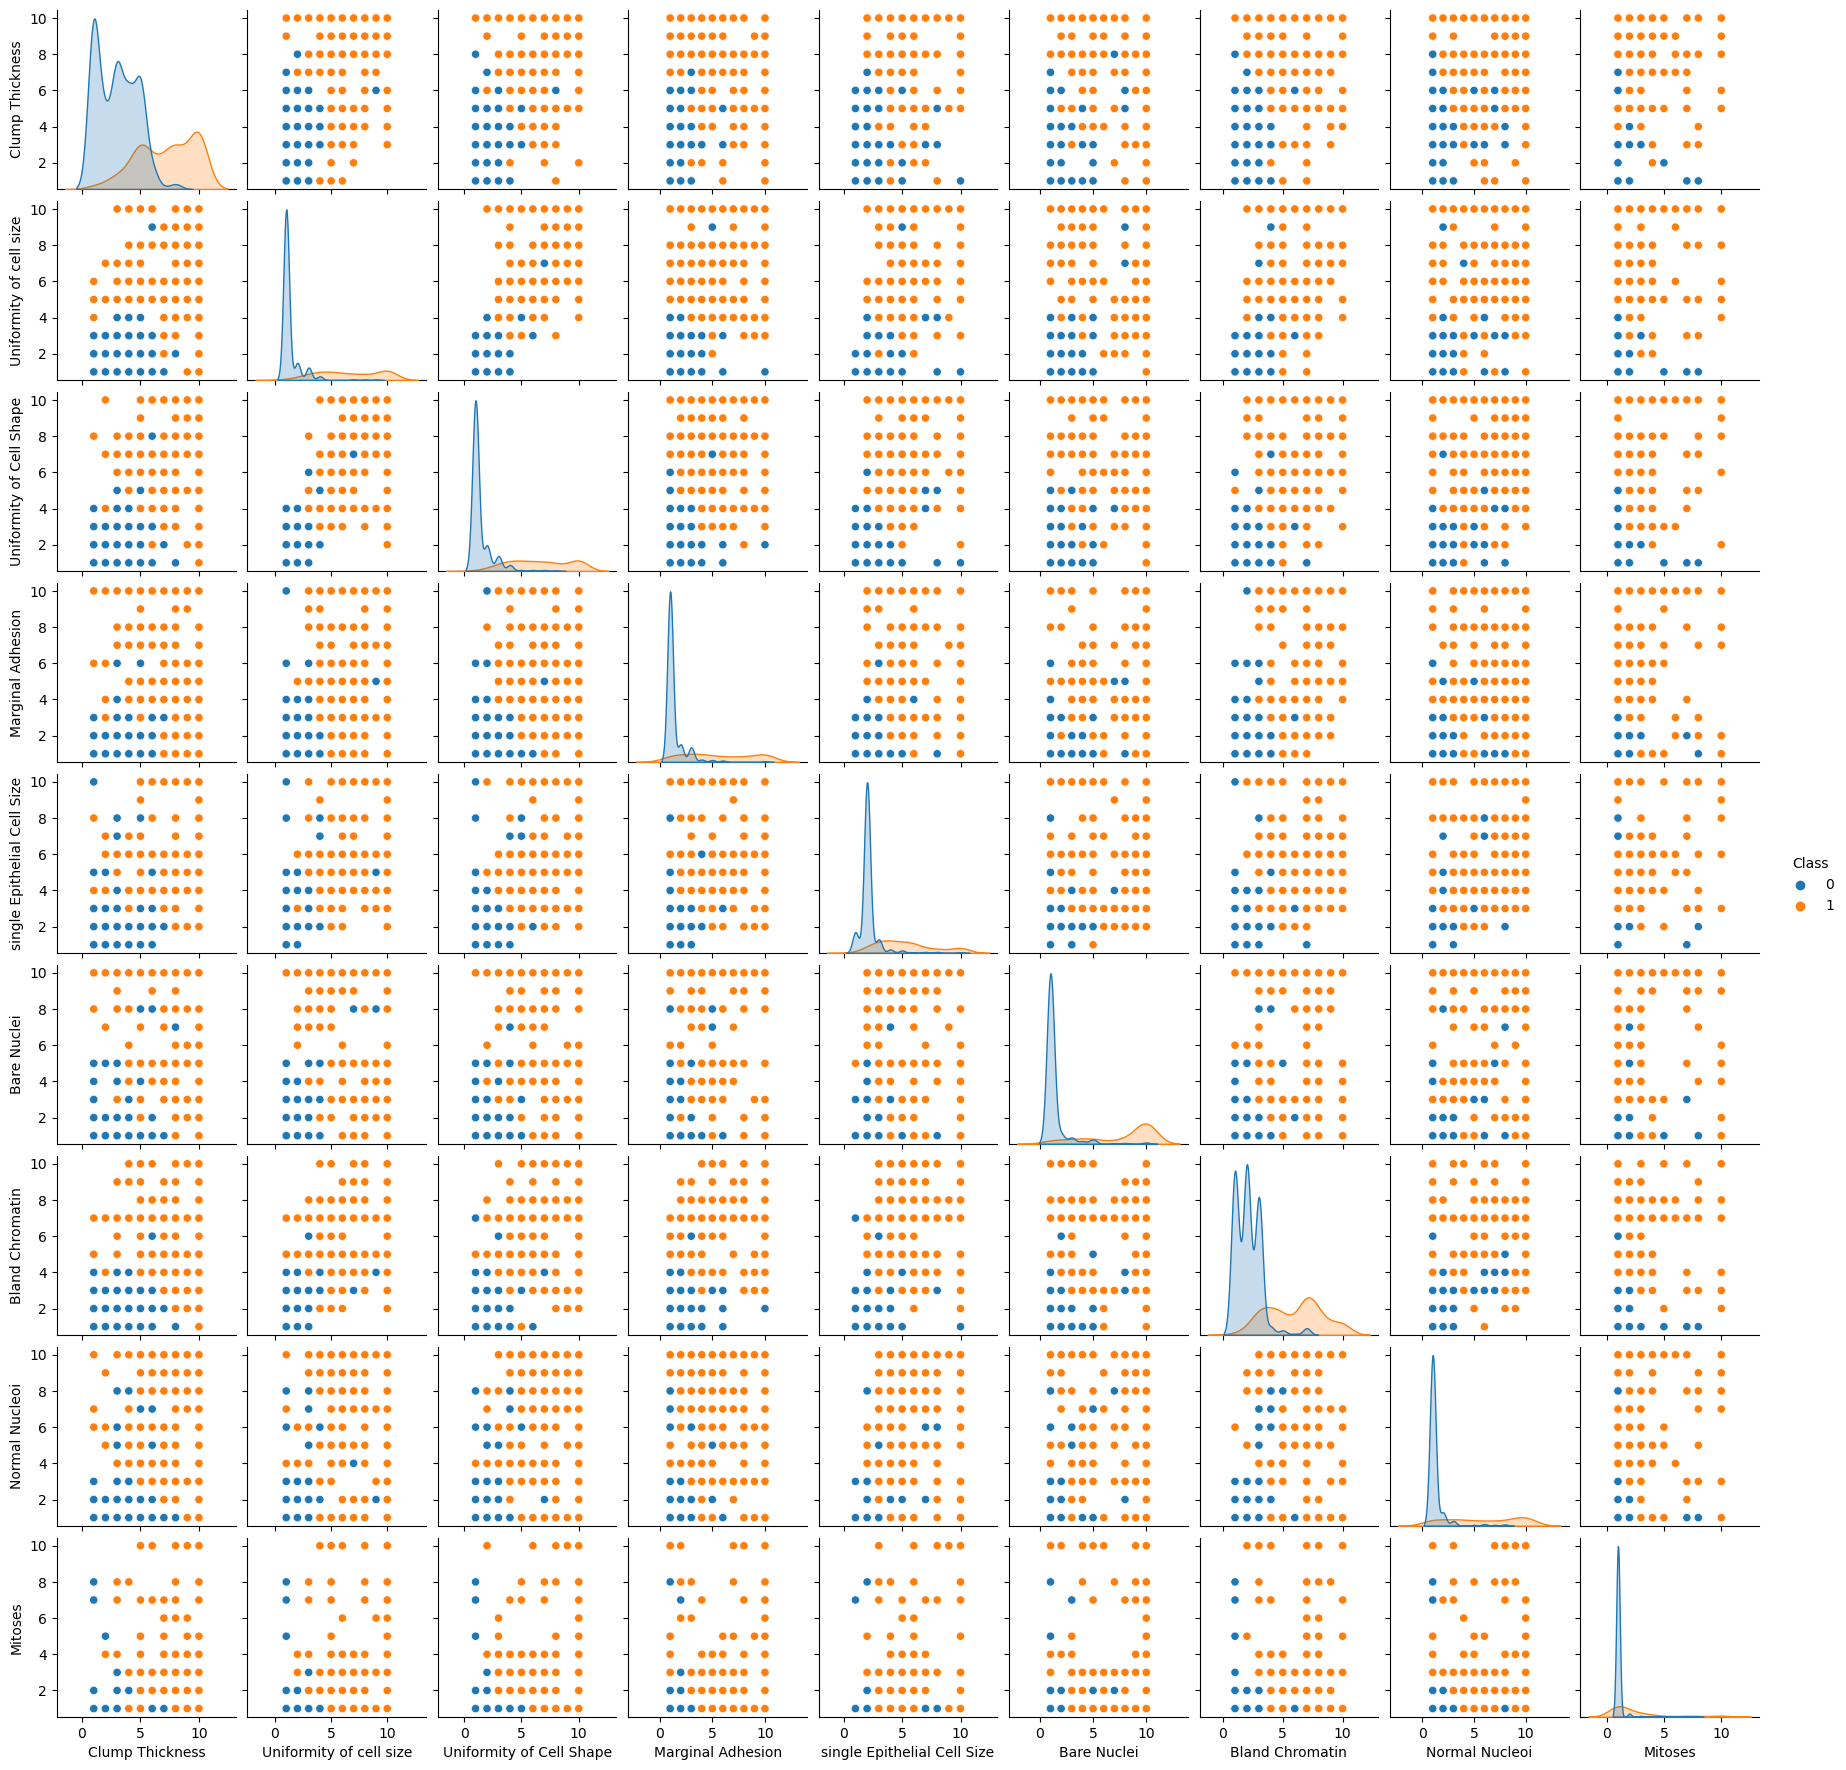

In [56]:
sns.pairplot(data, hue='Class', height=2)
plt.show()

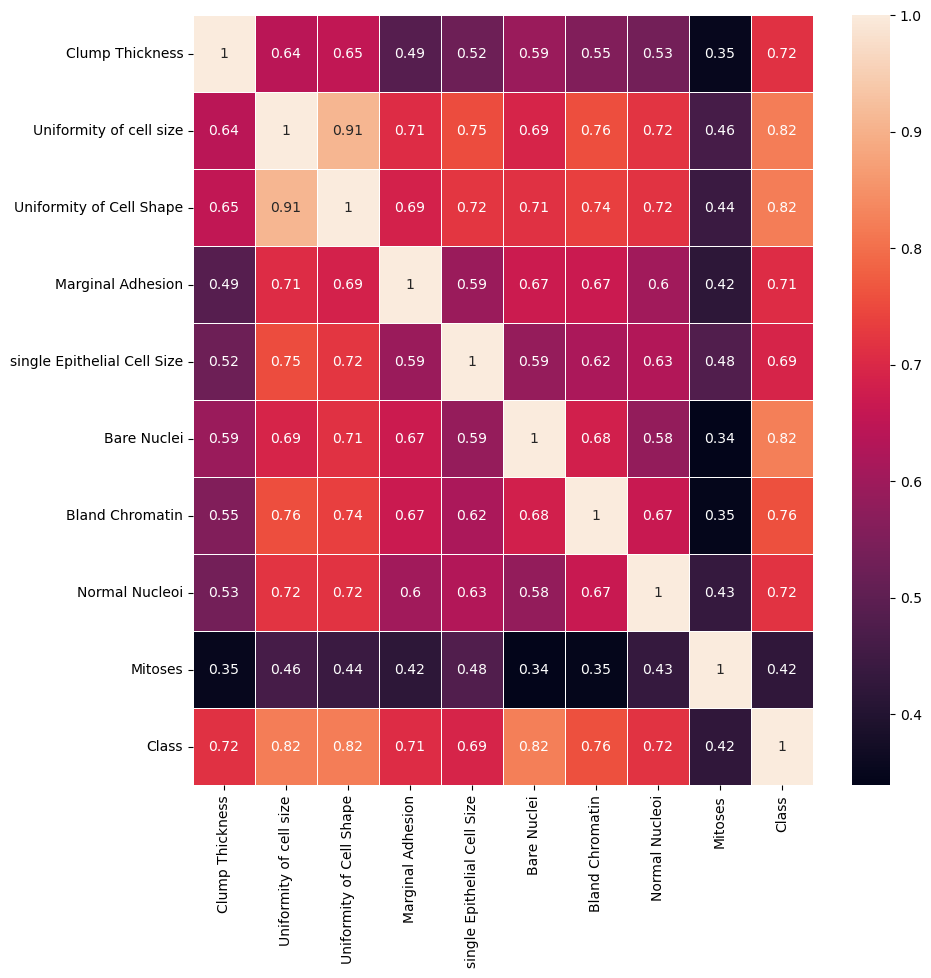

In [70]:
correlation = data.corr()
# print(correlation)
plt.figure(figsize=(10,10))
heatmap = sns.heatmap(correlation, annot=True, linewidths=0.5, linecolor='white')
plt.show()

In [58]:
# Train test Split

#Select 80% Data Training
data_train = data.sample(frac=0.8)
x_train = np.array(data_train.iloc[:, :-1])
y_train = np.array(data_train["Class"])

# Select Rest data for testing
data_test = data.drop(data_train.index)
x_test = np.array(data_test.iloc[:, :-1])
y_test = np.array(data_test["Class"])

#Show number of training and testing data points
print("Number of training data points: ", len(x_train)) # training data yang jadi bahan training
print("Number of testing data points: ", len(x_test)) # tesst untuk dibandingin prediksi sama hasil aslinya


Number of training data points:  546
Number of testing data points:  136


In [59]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train, y_train); # ini perintah untul training nya

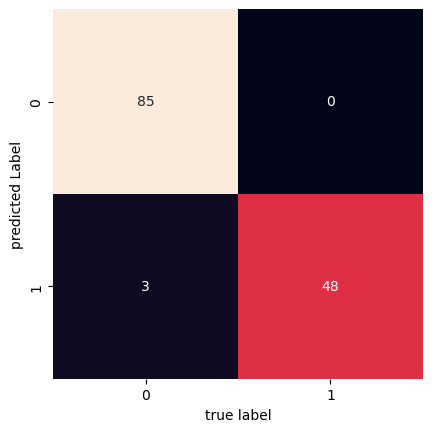

In [60]:
labels = model.predict(x_test) # jadilah modenya, dan diuji disini
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel("true label")
plt.ylabel("predicted Label")
plt.show()

#yang miss yang 0 , dan 3

In [61]:
# import scikit-learns metrics module for accuracy detection
from sklearn import metrics

# model accuracy, how often is the classifier connect?
print("accuracy: {:,.2f}".format(metrics.accuracy_score(y_test, labels)))



accuracy: 0.98


k-NN Classifier

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


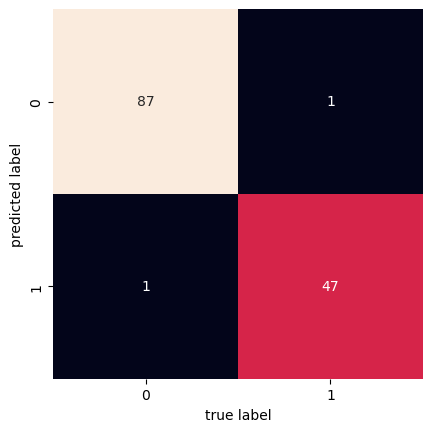

In [72]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3) #n_neighbors itu 

# print(model)

#train the model using the training sets
model.fit(x_train,y_train) # Ini printah training data

#predict output
labels = model.predict(x_test) # ini preerintah untuk prediksi data
mat = confusion_matrix(y_test, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel("true label")
plt.ylabel("predicted label")
plt.show()


In [63]:
#model Accuracy, how often is classifier correct?
print("Accuracy: {:,.2f}".format(metrics.accuracy_score(y_test, labels)))

Accuracy: 0.99
